03_feature_selection

In [39]:
import pandas as pd
import seaborn as sn
import numpy as np
from sklearn.neural_network import MLPClassifier   #Multi-Layer Perceptron Classifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt     
from sklearn.feature_selection import RFE


In [40]:
%store -r df_pca
%store -r df

In [41]:
from sklearn.ensemble import RandomForestClassifier

print(df_pca.columns) 

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'target'],
      dtype='object')


In [42]:
X = df_pca.drop('target', axis=1)  # Features (all columns except target)
y = df_pca['target']               # Target variable

rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

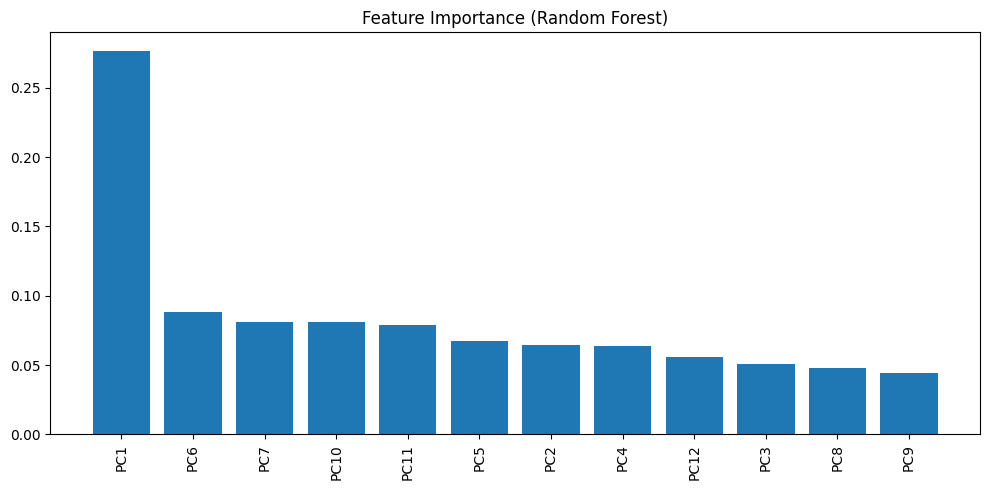

In [43]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns[indices]

# Plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features, rotation=90)
plt.tight_layout()
plt.show()

In [44]:
rfe=RFE(LogisticRegression(), n_features_to_select=8)

In [45]:
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features.tolist())

Selected features: ['PC1', 'PC2', 'PC5', 'PC6', 'PC7', 'PC9', 'PC10', 'PC11']


In [46]:
from sklearn.feature_selection import SelectKBest, chi2

# Make all values positive (important for chi2)
X_chi = X.copy()
X_chi = X_chi.apply(lambda x: x - x.min())

selector = SelectKBest(score_func=chi2, k=8)
selector.fit(X_chi, y)

selected_features = X.columns[selector.get_support()]
print("Chi2 selected features:", selected_features.tolist())

Chi2 selected features: ['PC1', 'PC2', 'PC5', 'PC6', 'PC7', 'PC9', 'PC10', 'PC11']


In [50]:

df8=pd.DataFrame(X, columns=selected_features)
df8['target']=y
df8.head()
df8.shape



(303, 9)

In [51]:
%store df8

Stored 'df8' (DataFrame)
